<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/train_v1_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Imports

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.2 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import torch
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


If locally needs GPU

In [3]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


## Dataset Check (Optional)
If you want to double-check that your dataset is correctly placed and has the expected files:

/content/drive/MyDrive/Insect Detection/dataset.zip

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [8]:
!ls -lh /content/drive/MyDrive/Insect\ Detection/

total 4.2G
-rw------- 1 root root 4.2G May 30 18:02 cleaned_dataset.zip
-rw------- 1 root root  324 May 29 23:17 compare_all_versions.ipynb
-rw------- 1 root root  15K May 30 18:03 fetch_data.ipynb
-rw------- 1 root root  324 May 29 23:17 test_and_eval.ipynb
-rw------- 1 root root 1.6M May 30 18:03 train_v1_baseline.ipynb
-rw------- 1 root root  324 May 29 23:16 train_v2_augmented.ipynb
-rw------- 1 root root  324 May 29 23:16 train_v3_bigger_model.ipynb
drwx------ 2 root root 4.0K May 28 16:56 utils
-rw------- 1 root root 909K May 28 16:44 YOLO8.ipynb


In [9]:
!cp /content/drive/MyDrive/Insect\ Detection/cleaned_dataset.zip .

In [10]:
!unzip -q cleaned_dataset.zip -d .

In [11]:
from pathlib import Path

# Assuming dataset is extracted into /content/dataset/content/dataset
base_path = Path("/content/dataset/content/dataset")
for split in ['train','test', 'val']:
    split_path = base_path / split
    image_count = len(list(split_path.rglob('*.jpg')))
    print(f"{split.capitalize()} images: {image_count}")

Train images: 1766
Test images: 384
Val images: 391


## Load and Train the Baseline Model

In [13]:
# Load YOLOv8 baseline
model = YOLO('yolov8s-cls.pt')

# Train the model
model.train(
    data=base_path,
    epochs=10,
    imgsz=640,
    batch=16,
    device=0 if torch.cuda.is_available() else 'cpu',
    name='yolov8s-cls_baseline' # This saves under runs/classify/yolov8s-cls_baseline
)

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/content/dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s-cls_baseline2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

train: Scanning /content/dataset/content/dataset/train... 3514 images, 0 corrupt: 100%|██████████| 3514/3514 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 357.7±377.9 MB/s, size: 1448.8 KB)


val: Scanning /content/dataset/content/dataset/val... 748 images, 0 corrupt: 100%|██████████| 748/748 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/yolov8s-cls_baseline2
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:36<00:00,  1.54s/it]

                   all     0.0508      0.195



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:33<00:00,  1.40s/it]

                   all      0.158      0.358



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:39<00:00,  1.65s/it]

                   all       0.19      0.468



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:34<00:00,  1.43s/it]

                   all      0.246      0.545



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:36<00:00,  1.53s/it]

                   all      0.281       0.59



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:38<00:00,  1.59s/it]

                   all      0.311       0.64



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:37<00:00,  1.56s/it]

                   all      0.328      0.663



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:39<00:00,  1.64s/it]

                   all      0.342      0.668



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:36<00:00,  1.53s/it]

                   all      0.348      0.682



      Epoch    GPU_mem       loss  Instances       Size


      10/10       3.1G      2.429         10        640: 100%|██████████| 220/220 [03:56<00:00,  1.08s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:35<00:00,  1.49s/it]

                   all       0.36      0.689



10 epochs completed in 0.749 hours.
Optimizer stripped from runs/classify/yolov8s-cls_baseline2/weights/last.pt, 10.4MB
Optimizer stripped from runs/classify/yolov8s-cls_baseline2/weights/best.pt, 10.4MB

Validating runs/classify/yolov8s-cls_baseline2/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,149,498 parameters, 0 gradients, 12.5 GFLOPs
train: /content/dataset/content/dataset/train... found 3514 images in 58 classes ✅ 
ERROR ❌ val: /content/dataset/content/dataset/val... found 748 images in 57 classes (requires 58 classes, not 57)
ERROR ❌ test: /content/dataset/content/dataset/test... found 748 images in 57 classes (requires 58 classes, not 57)


               classes   top1_acc   top5_acc:   8%|▊         | 2/24 [00:01<00:12,  1.76it/s]

               classes   top1_acc   top5_acc:  17%|█▋        | 4/24 [00:06<00:34,  1.75s/it]
  0%|          | 0.00/22.2M [00:00<?, ?B/s]
 44%|████▍     | 9.75M/22.2M [00:00<00:00, 97.2MB/s]
100%|██████████| 22.2M/22.2M [00:00<00:00, 81.5MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:39<00:00,  1.67s/it]


                   all       0.36      0.687
Speed: 0.7ms preprocess, 2.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8s-cls_baseline2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c33030f3050>
curves: []
curves_results: []
fitness: 0.5233957320451736
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.3596256673336029, 'metrics/accuracy_top5': 0.6871657967567444, 'fitness': 0.5233957320451736}
save_dir: PosixPath('runs/classify/yolov8s-cls_baseline2')
speed: {'preprocess': 0.6698474344886106, 'inference': 2.7414906149766605, 'loss': 0.0007645347561975312, 'postprocess': 0.001429403745323774}
task: 'classify'
top1: 0.3596256673336029
top5: 0.6871657967567444

## View Results (Optional)

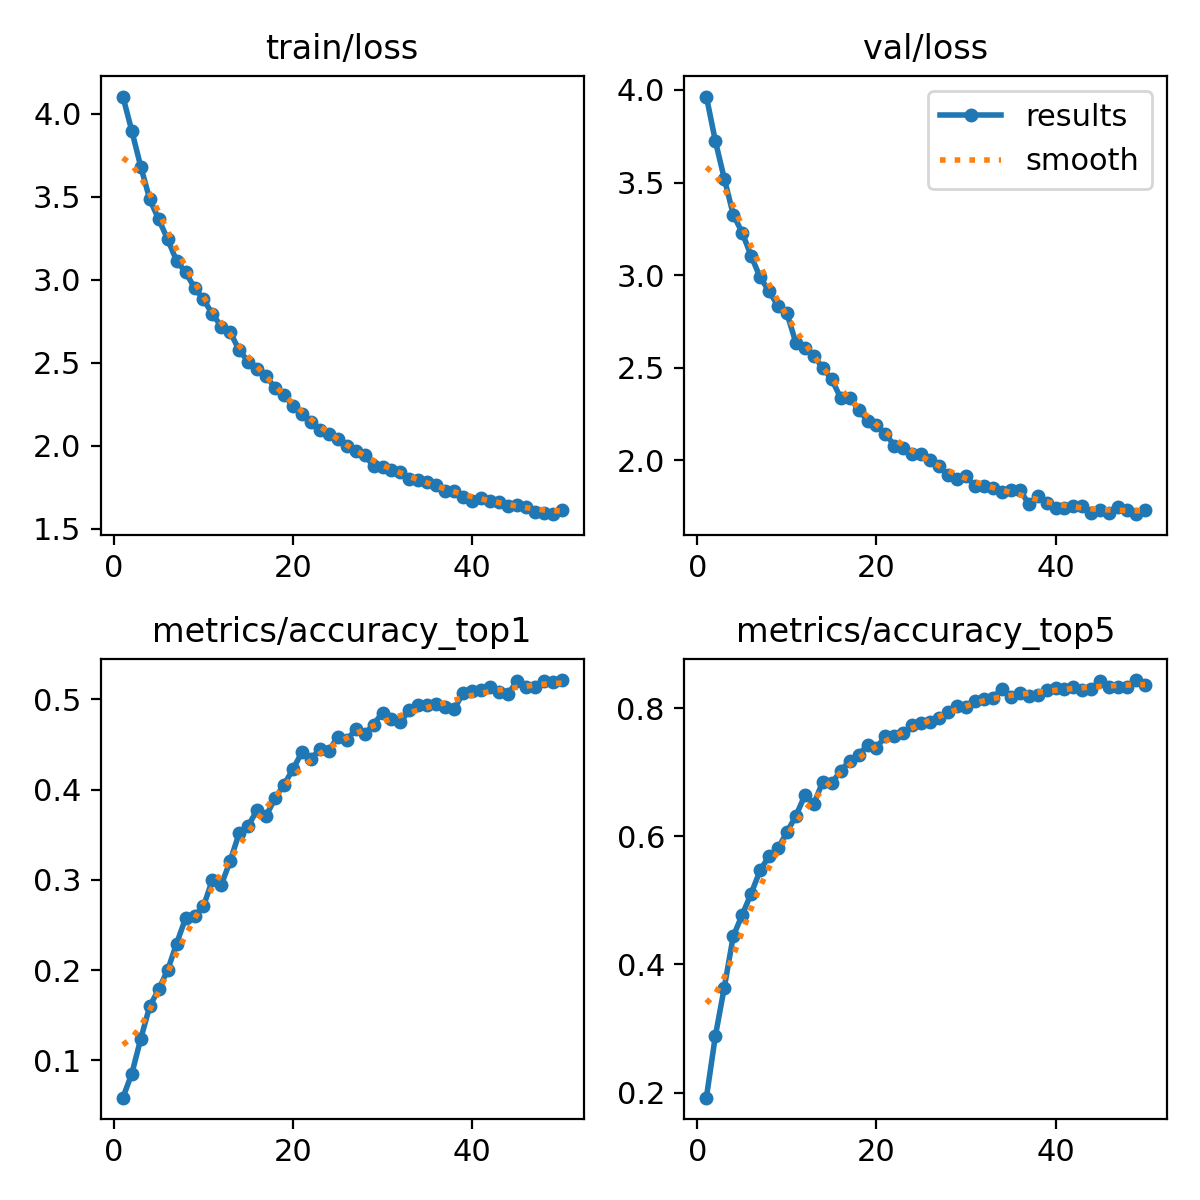

In [ ]:
# After training, check results
from IPython.display import Image, display
results_dir = Path("runs/classify/yolov8s-cls_baseline2")
display(Image(filename=results_dir / "results.png"))

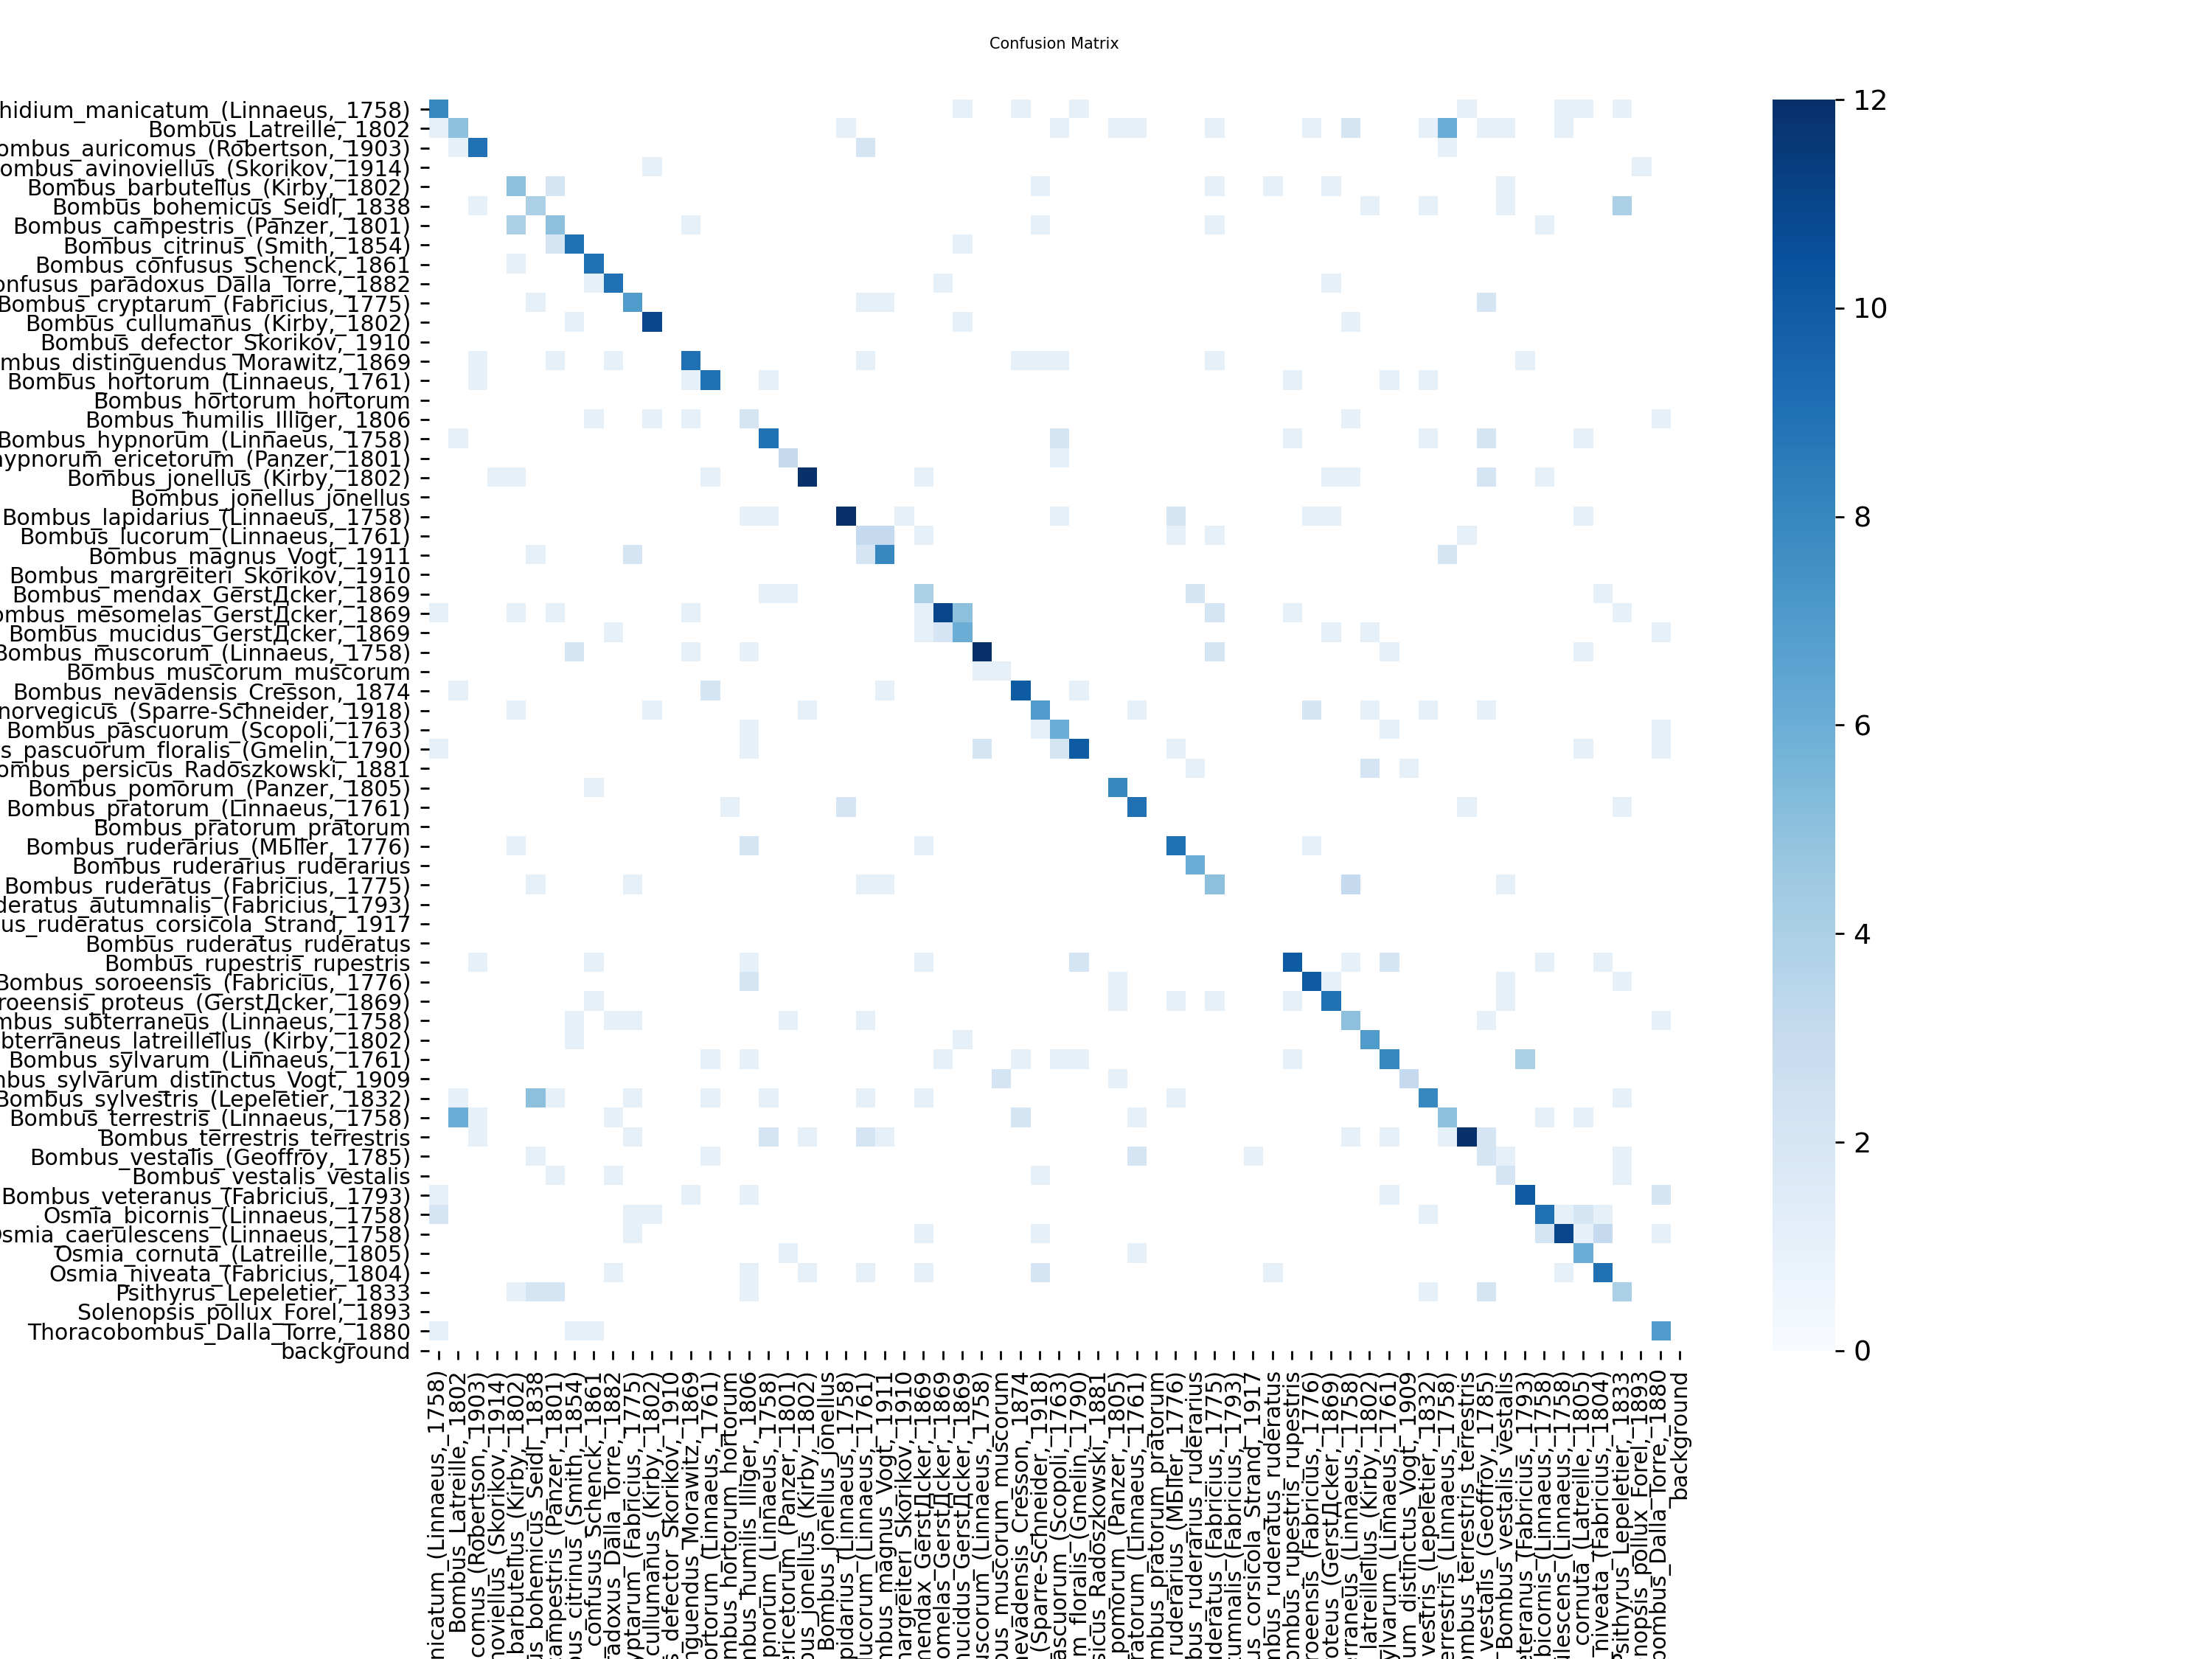

In [ ]:
display(Image(filename=results_dir / "confusion_matrix.png"))